In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import raw data

In [66]:
df = pd.read_csv('../data/raw/SP_house_prices_raw.csv')

In [67]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## Convert house values to numeric type

In the notebook of day 1, I have converted the column with the values of houses ('valor') to numeric type. But I haven't realized that strings in the values of some rows contains reting information. I'll process this data again.

In [68]:
dfValues = df['Valor'].str.split(expand = True)
dfValues

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


The split method created 3 columns. It seems that the values are in the second column.

In [69]:
#Verify values
dfValues[0].unique()

array(['R$'], dtype=object)

In [70]:
dfValues[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

'None' is probably related to selling price. '/Mês' (month), '/Ano' (year) and '/Dia' are probably related to renting prices

Include column 1 and 2 in the original dataframe

In [71]:
#Make copy of dataframe, drop original values ('valor') column, and include column with value and value type.
df_2 = df.copy(deep = True)
df_2.drop(columns = ['Valor'])
df_2[['Valor', 'Tipo']] = dfValues[[1,2]]

In [72]:
df_2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,None


In [73]:
#Remove dots ('.') in strings in value ('Valor') column
df_2['Valor'] = df_2['Valor'].str.replace(".", "", regex = False)

In [74]:
df_2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,None


In [75]:
#Transform house prices to numeric type
df_2['Valor'] = pd.to_numeric(df_2['Valor'])

In [76]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  int64 
 8   Tipo       852 non-null    object
dtypes: int64(5), object(4)
memory usage: 703.8+ KB


**Consider only rows related to selling prices, i.e., column 'Tipo' has 'None' entry**

In [77]:
df_2 = df_2[df_2['Tipo'].isnull()]

In [78]:
#Verify if 'Tipo' column has only 'None' values
df_2['Tipo'].unique()

array([None], dtype=object)

In [79]:
#Drop 'Tipo' column
df_2.drop(columns = ['Tipo'], inplace = True)

In [80]:
df_2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000


## Explore data

In [81]:
#Statistical data
df_2.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


## Tasks

### 1 - Change unit of prices to 10^6

In [82]:
#Divide all prices by 1e6
df_2['Valor'] = df_2['Valor'].div(1e6)

In [83]:
df_2

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,0.665
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2.300
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1.050


In [84]:
df_2.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000
mean,434.416230,3.446811,3.797073,3.960135,3.052203
std,7856.422978,1.048944,1.967873,2.601022,3.944208
min,10.000000,1.000000,1.000000,1.000000,0.013000
25%,168.000000,3.000000,2.000000,2.000000,0.890000
50%,276.000000,3.000000,4.000000,4.000000,1.800000
75%,450.000000,4.000000,5.000000,5.000000,3.500000
max,750000.000000,16.000000,40.000000,50.000000,65.000000


### 2 - Make an legible histogram of the prices

<AxesSubplot:>

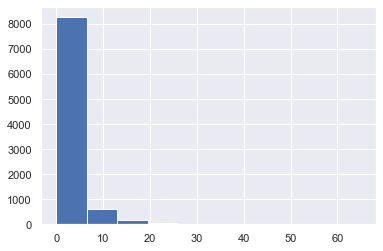

In [85]:
#Make a first histogram
df_2['Valor'].hist()

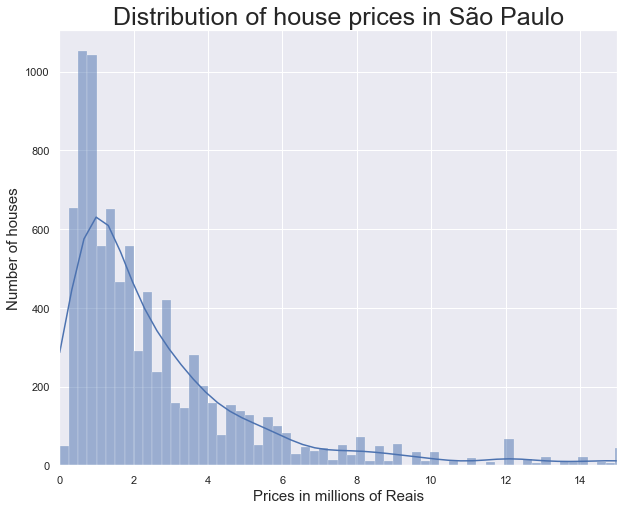

In [86]:
sns.set()
plt.figure(figsize = (10, 8))
ax = sns.histplot(data = df_2['Valor'], kde = True, line_kws = {'color':'orange'})
#Set histogram title
ax.set_title("Distribution of house prices in São Paulo", fontsize = 25)
#Consider prices until 15 million.
plt.xlim(0, 15)
#Set axis names
plt.xlabel('Prices in millions of Reais', fontsize = 15)
plt.ylabel("Number of houses", fontsize = 15)

plt.show()

### 3 - Price per square foot by district

In [87]:
#Create collum with price per square foot
df_2['Valor/m2'] = df_2['Valor'].divide(df_2['Metragem'])

In [88]:
df_2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,0.00700
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,0.00746
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,0.00304
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,0.00221
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,0.00540


In [89]:
#Change unit of prices per square foot to 10^3
#Multiply 'Valor/m2' by 1e3
df_2['Valor/m2'] = df_2['Valor/m2'].mul(1e3)

In [90]:
df_2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000


In [91]:
#Group data by district and take the mean of price per square foot
dfDistricts = df_2.groupby(by = ['Bairro'])['Valor/m2']

In [92]:
DistrictMeans = dfDistricts.mean()
DistrictMeans

Bairro
Aclimação             7.656169
Alto da Boa Vista     5.849569
Alto da Lapa          7.606728
Alto da Mooca         5.691740
Alto de Pinheiros    11.269980
                       ...    
Vila Água Funda       4.467128
Água Branca           7.269114
Água Fria             5.841104
Água Funda            3.876863
Água Rasa             4.509608
Name: Valor/m2, Length: 697, dtype: float64

In [93]:
#Use plotly to make a plot the mean price per square foot per district
import plotly.express as px

fig = px.line(DistrictMeans, y = 'Valor/m2', title = 'Price per square foot by district',
             labels={"Bairro": "District",  "Valor/m2": "Price/m2"})
fig.show()

### 4 - Explore visualization libraries

This was done together with the previous task, where it was learned how to make plots in the plotly library. This library allows you to use interative graphs, which seems to be a very good option to make plots with a large amount of data without making then illegible.

### 5 - Analyse the quartiles, median and outliers

We will use boxplots to analyse this for all numeric collumn in the dataframe

Since there are different scales for the data of different columns, we will make separated boxplots

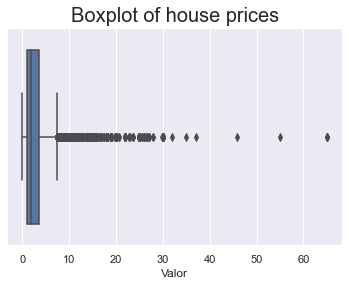

In [94]:
#Make boxplot of house prices
plt.figure()
plt.title("Boxplot of house prices", fontsize = 20)
sns.boxplot(x = df_2['Valor'])
plt.show()

We can see that there are some houses with expensive pricces that are classified as outliers

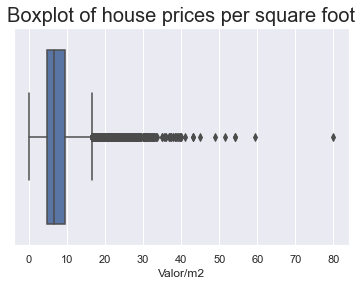

In [95]:
#Make boxplot of price per square foot
plt.figure()
plt.title("Boxplot of house prices per square foot", fontsize = 20)
sns.boxplot(x = df_2['Valor/m2'])
plt.show()

Again, we can see that there are outliers with expensive prices per square foot

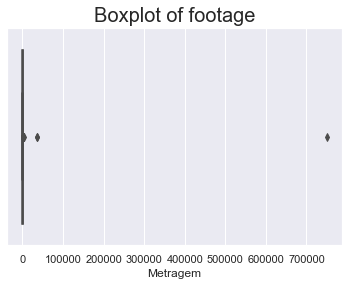

In [96]:
#Make boxplot with the footage
plt.figure()
plt.title("Boxplot of footage", fontsize = 20)
sns.boxplot(x = df_2['Metragem'])
plt.show()

There are few outliers concerning the house footage

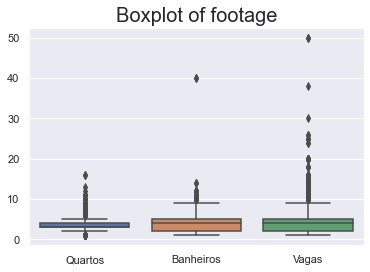

In [97]:
#Make boxplot with the number of rooms, bathrooms and parking spaces
plt.figure()
plt.title("Boxplot of footage", fontsize = 20)
sns.boxplot(data = df_2[['Quartos', 'Banheiros', 'Vagas']])
plt.show()

There are many outliers relatetd to the three columns, but some of the extreme outliers in number of bathrooms ('banheiros') and parking spaces ('vagas') calls special attention.

## Save dataframe

In [98]:
df_2.to_csv('../data/interim/Data_Day2.csv', index = False)